In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# 1. Load dataset
df = pd.read_csv(r"D:\SBUP\Notes\ML LAB USING PYTHON MCA\Untitled Folder\Crop_recommendation.csv")

In [5]:
# 2. Display first 5 rows
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [6]:
# 3. Show shape and column names
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

Shape: (2200, 8)
Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [7]:
# 4. Check unique values in target variable (label)
print("Unique crops:", df['label'].unique())

Unique crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [8]:

# 5. Check for missing/null values
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:

# 6. Display data types
print(df.dtypes)


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  

In [ ]:
#Display Basis Stas
df.describe()

In [10]:
# 7. Crop count table
crop_counts = df["label"].value_counts()
print(crop_counts)

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


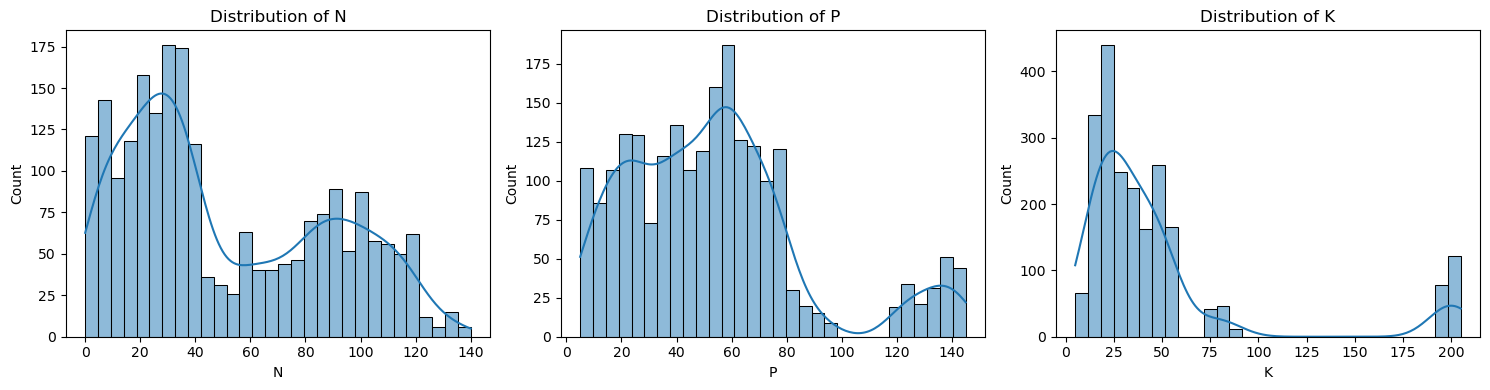

In [11]:
# 8. Plot histograms for N, P, K
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, feature in enumerate(['N', 'P', 'K']):
    sns.histplot(df[feature], ax=axes[idx], bins=30, kde=True)
    axes[idx].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

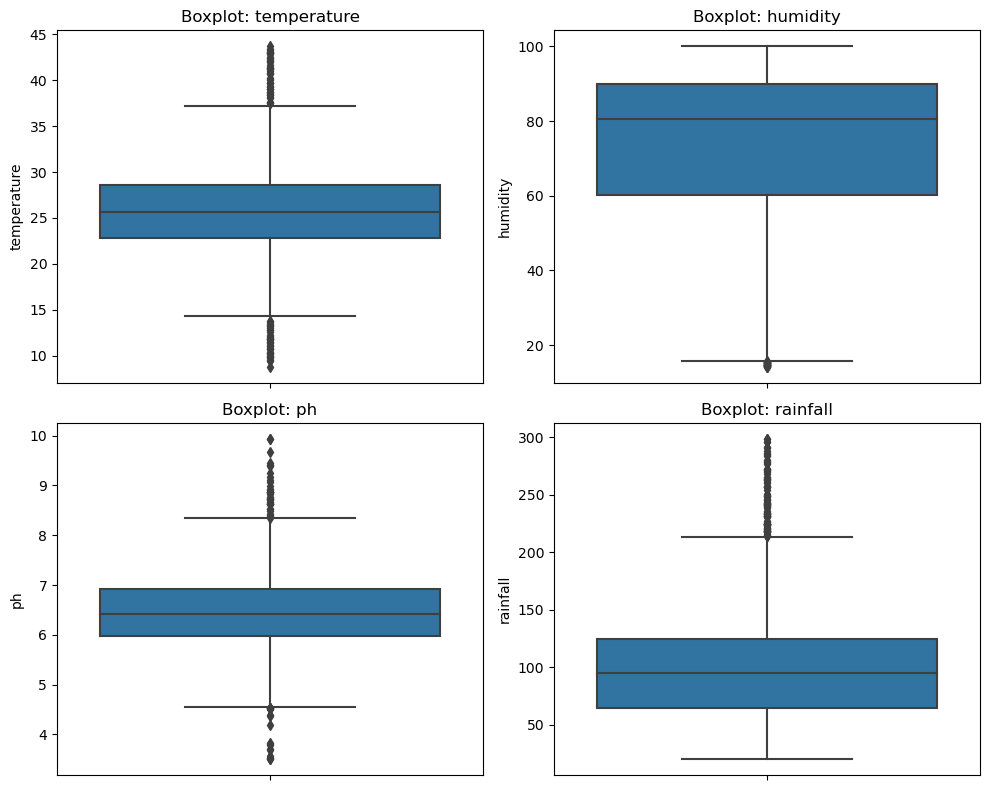

In [12]:
# 9. Boxplots for temperature, humidity, ph, rainfall
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
features = ['temperature', 'humidity', 'ph', 'rainfall']
for idx, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[idx//2][idx%2])
    axes[idx//2][idx%2].set_title(f'Boxplot: {feature}')
plt.tight_layout()
plt.show()

In [13]:
# 10. Encode label
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])


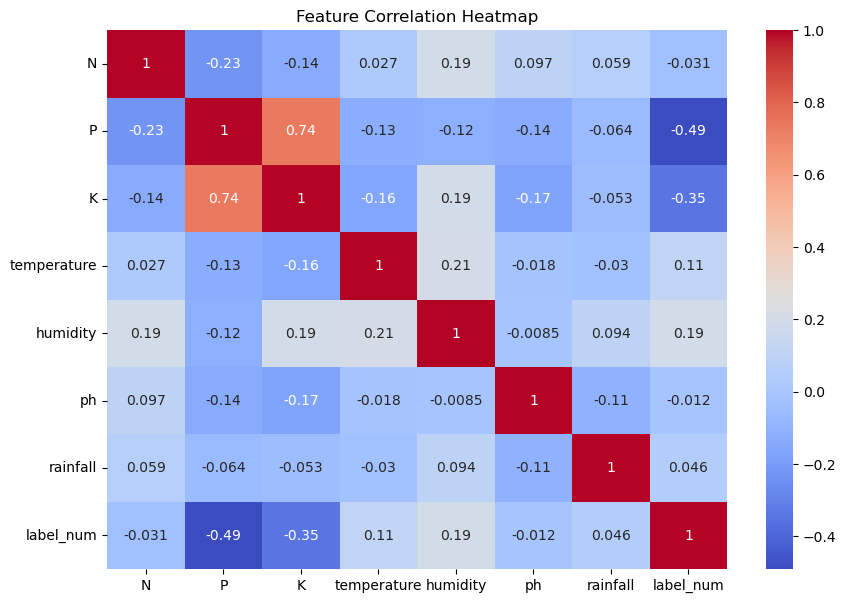

In [14]:
# 11. Show correlation heatmap
plt.figure(figsize=(10,7))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# 12. Train-test split
X = df[['N','P','K','temperature','humidity','ph','rainfall']].values
y = df['label_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
# 13. Train SVM classifier (linear kernel)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification report:\n", classification_report(y_test, y_pred_linear))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Support vectors per crop:", svm_linear.n_support_)

Linear SVM
Accuracy: 0.990909090909091
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      0.90      0.95        20
          12       1.00      1.00      1.00        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16      

In [17]:
# 14. Train SVM classifier (rbf kernel)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification report:\n", classification_report(y_test, y_pred_rbf))
print("Support vectors per crop:", svm_rbf.n_support_)

RBF SVM
Accuracy: 0.9840909090909091
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.80      1.00      0.89        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1

In [18]:
# 15. Compare accuracy and F1-scores
print("Linear SVM vs RBF SVM accuracy:", accuracy_score(y_test, y_pred_linear), "vs", accuracy_score(y_test, y_pred_rbf))

Linear SVM vs RBF SVM accuracy: 0.990909090909091 vs 0.9840909090909091


In [19]:
# 16. Recommend crop function
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    X_new = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    pred_num = svm_rbf.predict(X_new)[0]
    return le.inverse_transform([pred_num])[0]

In [20]:
# Example usage:
print("Recommended crop:", recommend_crop(90, 42, 43, 20.88, 82.00, 6.50, 202.94))

Recommended crop: rice
